Prepare Data for ARIMA

In [35]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Prepare data for ARIMA
glucose_series = data['Glucose_Level']

# Train-test split for ARIMA
train_size = int(len(glucose_series) * 0.8)
train, test = glucose_series[:train_size], glucose_series[train_size:]

print("Time-series data prepared for ARIMA!")

Time-series data prepared for ARIMA!


ARIMA Model

In [36]:
# Train ARIMA
arima_model = ARIMA(train, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Forecast
arima_forecast = arima_fit.forecast(steps=len(test))
mse = mean_squared_error(test, arima_forecast)
print(f"ARIMA Mean Squared Error: {mse:.2f}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA Mean Squared Error: 1248.26


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Prepare Data for LSTM

In [37]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data for LSTM
glucose_scaled = scaler.fit_transform(glucose_series.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(glucose_scaled)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Build LSTM Model

In [38]:
# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM
history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0609 - val_loss: 0.0479
Epoch 2/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0023 - val_loss: 0.0477
Epoch 3/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0037 - val_loss: 0.0469
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0026 - val_loss: 0.0476
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0023 - val_loss: 0.0473
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0014 - val_loss: 0.0467
Epoch 7/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0018 - val_loss: 0.0504
Epoch 8/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0027 - val_loss: 0.0465
Epoch 9/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0019 - val_loss: 0.0467
Epoch 10/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0021 - val_loss: 0.0471
Epoch 11/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0023 - val_loss: 0.0469
Epoch 12/20
390/390 ━━━━━━━━━━━━━━━━━━━━

Evaluate LSTM

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
LSTM Mean Squared Error: 0.05


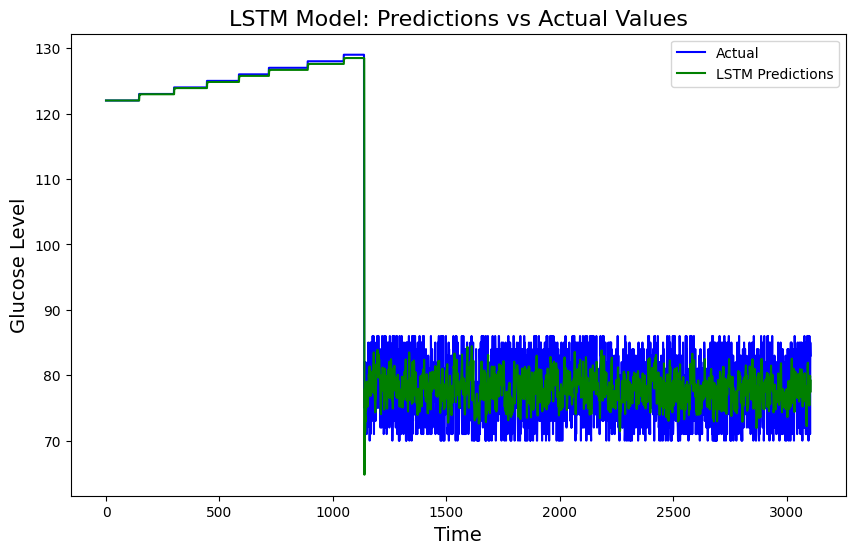

In [39]:
# Predict and evaluate LSTM
lstm_predictions = lstm_model.predict(X_test)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, lstm_predictions)
print(f"LSTM Mean Squared Error: {mse:.2f}")

# Reverse scaling for actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
lstm_predictions_actual = scaler.inverse_transform(lstm_predictions)

# Plot LSTM Predictions vs Actual Values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(lstm_predictions_actual, label='LSTM Predictions', color='green')
plt.title('LSTM Model: Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Glucose Level', fontsize=14)
plt.legend()
plt.show()


Combine ARIMA and LSTM Predictions

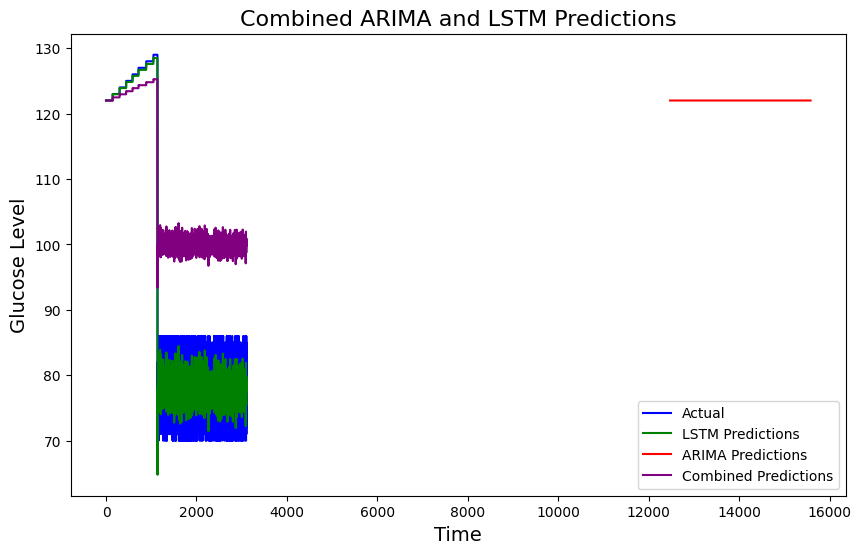

Combined Model Mean Squared Error: 326.34


In [40]:
# Combine ARIMA and LSTM Predictions
combined_predictions = (np.array(arima_forecast[-len(lstm_predictions_actual):]) + lstm_predictions_actual.flatten()) / 2

# Plot Combined Predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(lstm_predictions_actual, label='LSTM Predictions', color='green')
plt.plot(arima_forecast[-len(y_test_actual):], label='ARIMA Predictions', color='red')
plt.plot(combined_predictions, label='Combined Predictions', color='purple')
plt.title('Combined ARIMA and LSTM Predictions', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Glucose Level', fontsize=14)
plt.legend()
plt.show()

# Evaluate Combined Model
from sklearn.metrics import mean_squared_error
combined_mse = mean_squared_error(y_test_actual, combined_predictions.reshape(-1, 1))
print(f"Combined Model Mean Squared Error: {combined_mse:.2f}")

Save Models for Deployment

In [42]:
import joblib

# Save the best Random Forest model
joblib.dump(best_rf_model, 'best_rf_model.pkl')
print("Best Random Forest model saved!")

# Save the LSTM model
lstm_model.save('lstm_model.h5')
print("LSTM model saved!")

# Save the Ensemble model
joblib.dump(ensemble_model, 'ensemble_model.pkl')
print("Ensemble model saved!")


Best Random Forest model saved!
LSTM model saved!
Ensemble model saved!
